*Student Full Name: Derly Milded Montealegre Gonzalez 
*Student Number: 2024151 
*Module Title: Strategic Thinking
*Assessment Title: CA 2 Capstone Report
*Assessment Due Date: 16 April 2024 
*Date of Submission: 19 May 2024

# Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as preproc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="The least populated class in y has only 1 members")

# Reading the Data

Due to the fact that the original csv file had some chinese characters we use latin1 file encoding rather than the default type

In [2]:
data = pd.read_csv("housing.csv", encoding="latin1")
data = data.sample(frac=0.2)

C:\Users\monte\AppData\Local\Temp\ipykernel_26096\1111279284.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("housing.csv", encoding="latin1")


In [3]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
180118,https://bj.lianjia.com/chengjiao/BJCY90787261....,BJCY90787261,116.407373,40.011061,1111027375537,2015-11-21,1.0,13,312.0,37650,...,1.0,2000,4,6,0.267,1.0,1.0,1.0,7,62293.0
140266,https://bj.lianjia.com/chengjiao/BJCY85777975....,BJCY85777975,116.513063,39.937121,1111027381238,2013-05-25,NaN,0,357.5,39119,...,4.0,2006,1,6,0.333,1.0,1.0,0.0,7,62851.0
70764,https://bj.lianjia.com/chengjiao/101101344525....,101101344525,116.330146,40.039456,1111027377530,2017-04-25,40.0,51,563.0,68467,...,4.0,2009,4,6,0.333,1.0,0.0,1.0,8,65533.0
263199,https://bj.lianjia.com/chengjiao/BJHD90715672....,BJHD90715672,116.309462,39.941053,1111027379373,2015-11-12,NaN,1,1150.0,57446,...,4.0,2003,4,6,0.200,1.0,1.0,0.0,8,96125.0
34598,https://bj.lianjia.com/chengjiao/101100543180....,101100543180,116.600168,39.937451,1111027380517,2016-10-05,30.0,18,880.0,51462,...,1.0,2009,4,6,1.000,1.0,0.0,0.0,7,51255.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 180118 to 209645
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  63770 non-null  object 
 1   id                   63770 non-null  object 
 2   Lng                  63770 non-null  float64
 3   Lat                  63770 non-null  float64
 4   Cid                  63770 non-null  int64  
 5   tradeTime            63770 non-null  object 
 6   DOM                  32225 non-null  float64
 7   followers            63770 non-null  int64  
 8   totalPrice           63770 non-null  float64
 9   price                63770 non-null  int64  
 10  square               63770 non-null  float64
 11  livingRoom           63770 non-null  object 
 12  drawingRoom          63770 non-null  object 
 13  kitchen              63770 non-null  int64  
 14  bathRoom             63770 non-null  object 
 15  floor                63770 non-null

In [5]:
extr = data["tradeTime"].str.extract(r"^(\d{4})", expand=False)

In [6]:
extr.head(10)

180118    2015
140266    2013
70764     2017
263199    2015
34598     2016
109676    2015
276138    2016
318048    2015
253612    2015
142171    2013
Name: tradeTime, dtype: object

In [7]:
data["tradeTime"]=pd.to_numeric(extr)

In [8]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
180118,https://bj.lianjia.com/chengjiao/BJCY90787261....,BJCY90787261,116.407373,40.011061,1111027375537,2015,1.0,13,312.0,37650,...,1.0,2000,4,6,0.267,1.0,1.0,1.0,7,62293.0
140266,https://bj.lianjia.com/chengjiao/BJCY85777975....,BJCY85777975,116.513063,39.937121,1111027381238,2013,NaN,0,357.5,39119,...,4.0,2006,1,6,0.333,1.0,1.0,0.0,7,62851.0
70764,https://bj.lianjia.com/chengjiao/101101344525....,101101344525,116.330146,40.039456,1111027377530,2017,40.0,51,563.0,68467,...,4.0,2009,4,6,0.333,1.0,0.0,1.0,8,65533.0
263199,https://bj.lianjia.com/chengjiao/BJHD90715672....,BJHD90715672,116.309462,39.941053,1111027379373,2015,NaN,1,1150.0,57446,...,4.0,2003,4,6,0.200,1.0,1.0,0.0,8,96125.0
34598,https://bj.lianjia.com/chengjiao/101100543180....,101100543180,116.600168,39.937451,1111027380517,2016,30.0,18,880.0,51462,...,1.0,2009,4,6,1.000,1.0,0.0,0.0,7,51255.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 180118 to 209645
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  63770 non-null  object 
 1   id                   63770 non-null  object 
 2   Lng                  63770 non-null  float64
 3   Lat                  63770 non-null  float64
 4   Cid                  63770 non-null  int64  
 5   tradeTime            63770 non-null  int64  
 6   DOM                  32225 non-null  float64
 7   followers            63770 non-null  int64  
 8   totalPrice           63770 non-null  float64
 9   price                63770 non-null  int64  
 10  square               63770 non-null  float64
 11  livingRoom           63770 non-null  object 
 12  drawingRoom          63770 non-null  object 
 13  kitchen              63770 non-null  int64  
 14  bathRoom             63770 non-null  object 
 15  floor                63770 non-null

In [10]:
data.shape

(63770, 26)

In [11]:
data.describe()

,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,63770.000000,63770.000000,6.377000e+04,63770.000000,32225.000000,63770.000000,63770.000000,63770.000000,63770.000000,63770.000000,63352.000000,63770.000000,63770.000000,63770.000000,63765.000000,63765.000000,63765.000000,63770.000000,63669.000000
mean,116.418770,39.950007,1.131145e+12,2014.790466,28.572661,16.719947,348.521256,43527.039439,83.156549,0.994715,3.001417,2.609707,4.464325,0.381166,0.578970,0.646060,0.600972,6.762851,63646.706121
std,0.112248,0.092042,1.531625e+12,1.654276,49.571362,34.141710,224.476816,21613.840569,37.010133,0.110257,1.271683,1.309886,1.897528,0.178477,0.493728,0.478195,0.489702,2.807522,22265.799192
min,116.072514,39.627030,1.111027e+12,2002.000000,1.000000,0.000000,0.100000,1.000000,9.500000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20483.000000
25%,116.345639,39.893276,1.111027e+12,2013.000000,1.000000,0.000000,205.000000,28156.250000,57.930000,1.000000,1.000000,1.000000,2.000000,0.250000,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416950,39.934643,1.111027e+12,2015.000000,6.000000,5.000000,295.000000,38810.000000,74.275000,1.000000,4.000000,3.000000,6.000000,0.333000,1.000000,1.000000,1.000000,7.000000,59023.000000
75%,116.477581,40.004167,1.111027e+12,2016.000000,36.000000,18.000000,427.000000,53784.750000,98.740000,1.000000,4.000000,4.000000,6.000000,0.500000,1.000000,1.000000,1.000000,8.000000,75942.000000
max,116.732378,40.252758,1.184867e+14,2018.000000,1335.000000,1085.000000,6000.000000,150000.000000,922.700000,4.000000,4.000000,4.000000,6.000000,3.000000,1.000000,1.000000,1.000000,13.000000,183109.000000


# Preprocesing the data

### Dropping irrelevant features

Some features are logicaly irrelevants to the independant variable such as: id, url and floor therefore we drop them

In [12]:
data.drop(['id', 'url', 'floor'], axis=1, inplace=True)

### Dropping rows with missed Prices (target variable)

In [13]:
data.dropna(subset=['price'], inplace=True)

# Calculate the number of missing values per variable

In [14]:
missing_counts = data.isna().sum()
missing_df = pd.DataFrame({'Variable': missing_counts.index, 'Value': missing_counts.values})
missing_df = missing_df[missing_df['Value'] > 0]
missing_df['Percentage'] = missing_df['Value'] / len(data)
missing_df = missing_df.sort_values(by='Percentage', ascending=False)

# Missing values graph

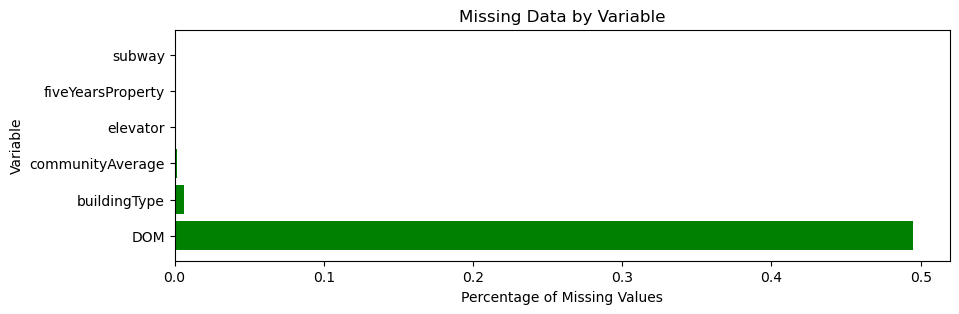

In [15]:
plt.figure(figsize=(10, 3))
plt.barh(missing_df['Variable'], missing_df['Percentage'], color='green')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Variable')
plt.title('Missing Data by Variable')
plt.show()

In [16]:
missing_value_formats = ["?", "NA", "Na", "NaN.", ".NaN", "NaN", "nA", "na", "n.a", "n.a.", "Î´Öª", ".n.a", "n/a", "nan", "--", "UnKnown"]
data = pd.read_csv('housing.csv', na_values=missing_value_formats, encoding='latin1')

C:\Users\monte\AppData\Local\Temp\ipykernel_26096\4082449589.py:2: DtypeWarning: Columns (1,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('housing.csv', na_values=missing_value_formats, encoding='latin1')


I want to better understand the distribution of the data in the 'buildingType', 'communityAverage', 'constructionTime'column,
identify possible outliers, evaluate if the variability of the mean is significantly greater than the median, 
and check if the standard deviation is high.

In [17]:
data[['DOM','buildingType', 'communityAverage', 'constructionTime']].describe() 

,DOM,buildingType,communityAverage,constructionTime
count,160874.000000,316830.000000,318388.000000,299568.000000
mean,28.822339,3.009790,63682.446305,1999.002517
std,50.237343,1.269857,22329.215447,22.443793
min,1.000000,0.048000,10847.000000,0.000000
25%,1.000000,1.000000,46339.000000,1994.000000
50%,6.000000,4.000000,59015.000000,2001.000000
75%,37.000000,4.000000,75950.000000,2006.000000
max,1677.000000,4.000000,183109.000000,2016.000000


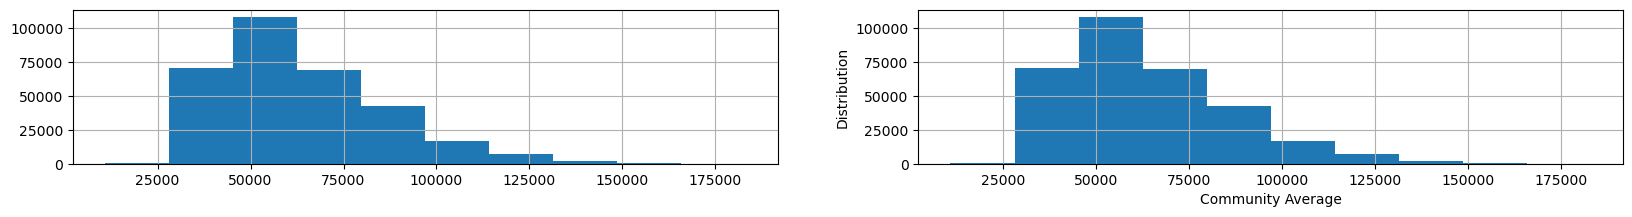

In [18]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['communityAverage'].hist(ax=ax1)
plt.xlabel('Community Average')
plt.ylabel('Distribution')

data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)

data['communityAverage'].hist(ax=ax2)

plt.show()


Using the median of the existing values in the buildingType,communityAverage column to replace missing values

In [19]:
data['DOM'].fillna(data['DOM'].mean(), inplace=True)
data['buildingType'].fillna(data['buildingType'].mode()[0], inplace=True)
data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)
data['constructionTime'].fillna(data['constructionTime'].mean(), inplace=True)
data['elevator'].fillna(data['elevator'].mode()[0], inplace=True)
data['fiveYearsProperty'].fillna(data['fiveYearsProperty'].mean(), inplace=True)
data['subway'].fillna(data['subway'].mode()[0], inplace=True)
data['bathRoom'].fillna(data['bathRoom'].mode()[0], inplace=True)

Identifying which columns have missing values

In [20]:
data.isnull().sum()

url                    0
id                     0
Lng                    0
Lat                    0
Cid                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

## Data standardization

In [21]:
from sklearn import preprocessing

X = data.drop('price', axis=1)
y = data['price']

X_scaled = preprocessing.scale(X)

ValueError: could not convert string to float: 'https://bj.lianjia.com/chengjiao/101084782030.html'

In [ ]:
X_df = pd.DataFrame(X_scaled, columns=X.columns)

# Model Linear Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
test_sizes = [0.2, 0.25, 0.3]
linear_scores = []

In [ ]:
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=test_size, random_state=42)
    
    lm = LinearRegression()
    scores = cross_val_score(lm, X_train, y_train, cv=5, scoring="r2")
    
    linear_scores.append(scores)

In [ ]:
for i, size in enumerate(test_sizes):
    print(f"R2 score for LR on {size}: {np.mean(linear_scores[i])}")

# Random Forest

In [ ]:
rf_scores = []

In [ ]:
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=test_size, random_state=42)
    
    rf = RandomForestRegressor(n_estimators=100)

    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="r2")

    rf_scores.append(scores)

In [ ]:
for i, size in enumerate(test_sizes):
    print(f"R2 score for {size} on {np.mean(rf_scores[i])}")

## Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

### Hyperparameter tuning

Linear Regretion

In [ ]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'n_jobs': [50, 100, 150]}
    
lm = LinearRegression()

gs = GridSearchCV(lm, param_grid=param_grid, cv=5)

gs.fit(X_train, y_train)

lm_best_params = gs.best_params_
lm_best_score = gs.best_score_

print("Best params for LR: ", lm_best_params)
print("Best score: ", lm_best_score)

Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

gs = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='r2')

gs.fit(X_train, y_train)

rf_best_params = gs.best_params_
rf_best_score = gs.best_score_

print(f"Best params for RF: {rf_best_params}")
print(f"Best score: {rf_best_score}")

# Graphics

Testing our modes withing the best split and best hyperparameters

In [ ]:
# getting the testing score of both models

Plotting the TP, FP, TN, FN with a confussion matrix and heat map

In [ ]:
# compare test labels and predited labels